In [135]:
import numpy as np
import pandas as pd

headers = ['age','sex','chest_pain','blood_p','serum','blood_s','electro','max_heart', 'angina','oldpeak','slope','vessel','thal','normal']
df = pd.read_csv('heart.dat',header=None, names = headers, sep = ' ')
pru = pd.read_csv('heart.dat',header=None, names = headers, sep = ' ')
datos = pd.read_csv('heart.dat', header = None, names = headers, sep = ' ')

df['sex'][df['sex'] == 0] = 'female'
df['sex'][df['sex'] == 1] = 'male'
df['chest_pain'][df['chest_pain'] == 1] = 'typical angina'
df['chest_pain'][df['chest_pain'] == 2] = 'atypical angina'
df['chest_pain'][df['chest_pain'] == 3] = 'non-anginal pain'
df['chest_pain'][df['chest_pain'] == 4] = 'asymptomatic'
df['blood_s'][df['blood_s'] == 0] = 'lower than 120mg/ml'
df['blood_s'][df['blood_s'] == 1] = 'greater than 120mg/ml'
df['electro'][df['electro'] == 0] = 'normal'
df['electro'][df['electro'] == 1] = 'ST-T wave abnormality'
df['electro'][df['electro'] == 2] = 'left ventricular hypertrophy'
df['angina'][df['angina'] == 0] = 'no'
df['angina'][df['angina'] == 1] = 'yes'
df['slope'][df['slope'] == 1] = 'upsloping'
df['slope'][df['slope'] == 2] = 'flat'
df['slope'][df['slope'] == 3] = 'downsloping'
df['thal'][df['thal'] == 3] = 'normal'
df['thal'][df['thal'] == 6] = 'fixed defect'
df['thal'][df['thal'] == 7] = 'reversable defect'

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packag

#Análisis de Datos

En primer lugar, visualizan los primeros 10 datos solamente para tener una idea de la forma de ellos. La columna 'Normal' nos dice si hay ausencia (1) o precencia (2) de *enfermedad cardiáca*. Posteriormente, se describen las columnas no binarias para posteriormente realizar un análisis con los boxplot de las mismas columnas.

In [136]:
df.head(10)


,age,sex,chest_pain,blood_p,serum,blood_s,electro,max_heart,angina,oldpeak,slope,vessel,thal,normal
0,70.0,male,asymptomatic,130.0,322.0,lower than 120mg/ml,left ventricular...,109.0,no,2.4,flat,3.0,normal,2
1,67.0,female,non-anginal pain,115.0,564.0,lower than 120mg/ml,left ventricular...,160.0,no,1.6,flat,0.0,reversable defect,1
2,57.0,male,atypical angina,124.0,261.0,lower than 120mg/ml,normal,141.0,no,0.3,upsloping,0.0,reversable defect,2
3,64.0,male,asymptomatic,128.0,263.0,lower than 120mg/ml,normal,105.0,yes,0.2,flat,1.0,reversable defect,1
4,74.0,female,atypical angina,120.0,269.0,lower than 120mg/ml,left ventricular...,121.0,yes,0.2,upsloping,1.0,normal,1
5,65.0,male,asymptomatic,120.0,177.0,lower than 120mg/ml,normal,140.0,no,0.4,upsloping,0.0,reversable defect,1
6,56.0,male,non-anginal pain,130.0,256.0,greater than 120...,left ventricular...,142.0,yes,0.6,flat,1.0,fixed defect,2
7,59.0,male,asymptomatic,110.0,239.0,lower than 120mg/ml,left ventricular...,142.0,yes,1.2,flat,1.0,reversable defect,2
8,60.0,male,asymptomatic,140.0,293.0,lower than 120mg/ml,left ventricular...,170.0,no,1.2,flat,2.0,reversable defect,2
9,63.0,female,asymptomatic,150.0,407.0,lower than 120mg/ml,left ventricular...,154.0,no,4.0,flat,3.0,reversable defect,2


In [137]:
df.describe()

,age,blood_p,serum,max_heart,oldpeak,vessel,normal
count,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000
mean,54.433333,131.344444,249.659259,149.677778,1.05000,0.670370,1.444444
std,9.109067,17.861608,51.686237,23.165717,1.14521,0.943896,0.497827
min,29.000000,94.000000,126.000000,71.000000,0.00000,0.000000,1.000000
25%,48.000000,120.000000,213.000000,133.000000,0.00000,0.000000,1.000000
50%,55.000000,130.000000,245.000000,153.500000,0.80000,0.000000,1.000000
75%,61.000000,140.000000,280.000000,166.000000,1.60000,1.000000,2.000000
max,77.000000,200.000000,564.000000,202.000000,6.20000,3.000000,2.000000


{'boxes': [<matplotlib.lines.Line2D at 0x7f01d903ae48>,
 'caps': [<matplotlib.lines.Line2D at 0x7f01d90758d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f01d9054630>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f01d9054c50>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7f01d9075470>,
  <matplotlib.lines.Line2D at 0x7f01dae50c50>]}

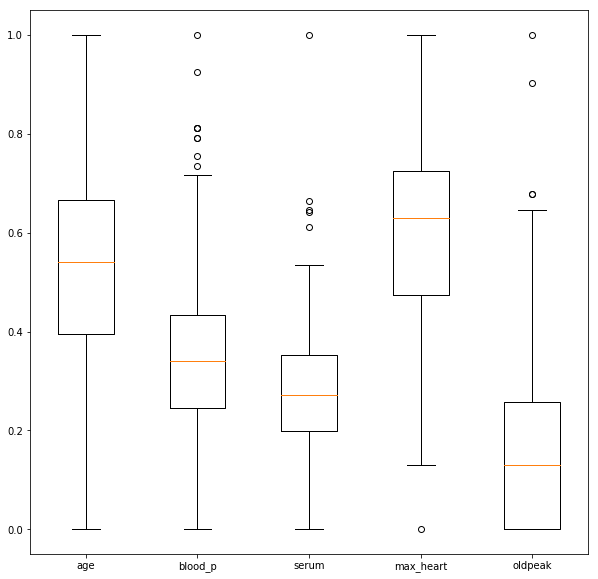

In [138]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler

#scaler = StandardScaler()
scaler = MinMaxScaler()
scaler.fit(pru)
pru = scaler.transform(pru)
pru = pd.DataFrame(pru, columns = headers)
real = ['age', 'blood_p', 'serum','max_heart', 'oldpeak']
ls = []
plt.figure(figsize = (10,10))
for k in real:
  ls = ls + [pru[k]]
plt.boxplot(ls, labels = real)

Antes de graficar los boxplots, se utilizó el escalamiento *MinMax* (así todos están en el mismo rango pero mantienen sus medias y varianzas) para poder visualizar de mejor manera las cajas. Esto debido a que los valores de los parámetros difieren mucho entre ellos (como lo es *serum* y *oldpeak*) ya que están medidos en distintas unidades.
En lo anterior, se puede apreciar que los datos se encuentran bien distribuidos, teniendo una cantidad mayor de outliers la *presión en la sangre*, con 6 puntos fuera de un total de 270. Si bien los datos son pocos, se espera que ello no afecte drásticamente al modelo ya que corresponde a poco menos de 3% de los datos. 
  En general las medianas están casi al centro lo que muestra una distribución **casi** simétrica. Las medianas más marcadas son aquellas del ratio máximo cardia´co de la personas, el cual se encuentra inclinado hacía la derecha, lo que implica que la distribución posee más datos en su primera parte. 
  
Pero en general los datos se encuentran bien distribuidos, lo que nos da buen inicio para poder entrenar un modelo debido a que no existe tan varianza en lo datos. A continuación veremos el comportamiento de las variables categóricas y de los datos a predecir.

In [139]:
print( 'Cantidad de pacientes con ausencia de enfermedad cardiaca = ', len(df['normal'][df['normal']==1]))
print( 'Cantidad de pacientes con precencia de enfermedad cardiaca = ', len(df['normal'][df['normal']==2]))

sanos = df[df['normal']==1]
enfermos = df[df['normal']==2]
pd.set_option('display.max_columns', None) 
pd.set_option('max_colwidth', 20)

sanos.describe(), enfermos.describe()


Cantidad de pacientes con ausencia de enfermedad cardiaca =  150
Cantidad de pacientes con precencia de enfermedad cardiaca =  120


(              age     blood_p       serum   max_heart     oldpeak      vessel  \
 count  150.000000  150.000000  150.000000  150.000000  150.000000  150.000000   
 mean    52.706667  128.866667  244.213333  158.333333    0.622667    0.286667   
 std      9.509830   16.457660   54.019085   19.283357    0.800851    0.648557   
 min     29.000000   94.000000  126.000000   96.000000    0.000000    0.000000   
 25%     45.000000  120.000000  209.000000  148.250000    0.000000    0.000000   
 50%     52.000000  130.000000  236.000000  161.000000    0.200000    0.000000   
 75%     59.000000  140.000000  268.750000  172.000000    1.175000    0.000000   
 max     76.000000  180.000000  564.000000  202.000000    4.200000    3.000000   
 
        normal  
 count   150.0  
 mean      1.0  
 std       0.0  
 min       1.0  
 25%       1.0  
 50%       1.0  
 75%       1.0  
 max       1.0  ,
               age     blood_p       serum   max_heart     oldpeak      vessel  \
 count  120.000000  120.

#Conviertiendo las variable categoricas 

Notemos que al momento de categorizar las variables, se crean nuevos parámetros para cada salida distinta de tal manera de crear el One-Hot vector deseado. 

Por ejemplo nuestro primer paciento tiene la forma de 

[ 70.  130.  322.  109.    2.4   3.    2.    0.    1.    1.    0.    0.
   0.    0.    1.    0.    1.    0.    1.    0.    0.    1.    0.    0.
   1.    0. ]

En donde sus entradas 7 y 8 que corresponden a *sex_female* y *sex_male*, respectivamente, hacen que  df[0][7:9] = [0. 1.]. Esto implica que nuestro paciente es hombre. 

In [0]:
df = pd.get_dummies(df)

In [141]:
print(df.columns)
df.head(9)

Index(['age', 'blood_p', 'serum', 'max_heart', 'oldpeak', 'vessel', 'normal',
       'sex_female', 'sex_male', 'chest_pain_asymptomatic',
       'chest_pain_atypical angina', 'chest_pain_non-anginal pain',
       'chest_pain_typical angina', 'blood_s_greater than 120mg/ml',
       'blood_s_lower than 120mg/ml', 'electro_ST-T wave abnormality',
       'electro_left ventricular hypertrophy', 'electro_normal', 'angina_no',
       'angina_yes', 'slope_downsloping', 'slope_flat', 'slope_upsloping',
       'thal_fixed defect', 'thal_normal', 'thal_reversable defect'],
      dtype='object')


,age,blood_p,serum,max_heart,oldpeak,vessel,normal,sex_female,sex_male,chest_pain_asymptomatic,chest_pain_atypical angina,chest_pain_non-anginal pain,chest_pain_typical angina,blood_s_greater than 120mg/ml,blood_s_lower than 120mg/ml,electro_ST-T wave abnormality,electro_left ventricular hypertrophy,electro_normal,angina_no,angina_yes,slope_downsloping,slope_flat,slope_upsloping,thal_fixed defect,thal_normal,thal_reversable defect
0,70.0,130.0,322.0,109.0,2.4,3.0,2,0,1,1,0,0,0,0,1,0,1,0,1,0,0,1,0,0,1,0
1,67.0,115.0,564.0,160.0,1.6,0.0,1,1,0,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,1
2,57.0,124.0,261.0,141.0,0.3,0.0,2,0,1,0,1,0,0,0,1,0,0,1,1,0,0,0,1,0,0,1
3,64.0,128.0,263.0,105.0,0.2,1.0,1,0,1,1,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,1
4,74.0,120.0,269.0,121.0,0.2,1.0,1,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0
5,65.0,120.0,177.0,140.0,0.4,0.0,1,0,1,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,1
6,56.0,130.0,256.0,142.0,0.6,1.0,2,0,1,0,0,1,0,1,0,0,1,0,0,1,0,1,0,1,0,0
7,59.0,110.0,239.0,142.0,1.2,1.0,2,0,1,1,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0,1
8,60.0,140.0,293.0,170.0,1.2,2.0,2,0,1,1,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,1


In [0]:
from sklearn.model_selection import train_test_split

colu = list(df.columns)
dummy_lab = df[['normal', 'blood_p']]
colu.remove('normal')
colu.remove('blood_p')
x_train = df[colu].values






In [143]:
x_train, x_test, dummy_train, dummy_test = train_test_split(x_train,dummy_lab, test_size = 0.3, stratify = dummy_lab['normal'])
scaler1 = StandardScaler()
scaler1.fit(x_train)
X_train_scl = scaler1.transform(x_train)
X_test_scl = scaler1.transform(x_test)

y_train = dummy_train['normal'].values -1
reg_train = dummy_train['blood_p'].values

y_test = dummy_test['normal'].values -1 
reg_test = dummy_test['blood_p'].values

print (X_train_scl.shape, y_train.shape, reg_train.shape)




(189, 24) (189,) (189,)


#Linear Regression

En primer lugar se realizaron las predicciones a los datos de entrenamiento y testeo para predecir los niveles de presión en la sangre. Se realizó un gráfico Q-Q comparándola con la disribución normal y se ve que los quantiles del medio logran adaptarse de buena forma a la distribución normal. Las colas de los datos se salen un poco de la linealidad pero esto se justifica los alguno de los *outliers* expuestos en los boxplots anteriores y puede, aún así, modelarse como distribución normal por la ley de los grandes números. (Hay que tener cuidado con esto último ya que poseemos pocos datos.)

Continuando con el estudio, se calculó el MSE para los resultados de la regresión y se obtuvo un valor de 257 de error para los datos de entranmiento y 254 para la predicción de los de testeo.

In [0]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_scl, reg_train)

reg_pred_train = model.predict(X_train_scl)
reg_pred_test =  model.predict(X_test_scl)

In [145]:
model.coef_

array([ 4.74765479,  1.85800572,  4.45109243,  1.29726157,  0.80490651,
        1.48116931, -1.48116931,  0.51481203,  0.03031618, -1.04798782,
        0.91204354,  1.44497031, -1.44497031,  2.63151029, -0.32818549,
       -0.21092619, -0.85404389,  0.85404389,  0.69529616, -0.37581362,
        0.02237776,  1.36350679, -1.08180996,  0.47430038])

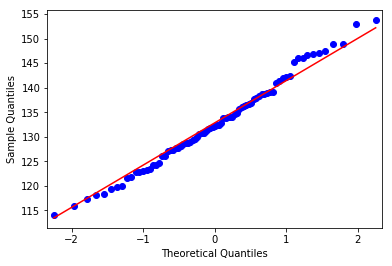

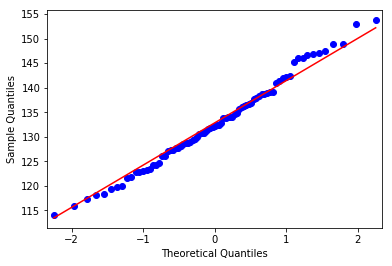

In [146]:
import statsmodels.graphics.gofplots as sm

sm.qqplot(reg_pred_test, line = 'q')

In [147]:
from sklearn.metrics import mean_squared_error as MSE

print('Error de datos de entrenamiento = ', MSE(reg_train, reg_pred_train))
print('Error de datos de testeo = ', MSE(reg_test, reg_pred_test))

Error de datos de entrenamiento =  251.03460826236602
Error de datos de testeo =  304.37606014466127


In [0]:
#F y Z scores


def f_score(X_train_scl, reg_train):
  ro = []
  for k in np.arange(X_train_scl.shape[1]):
    dummy = np.cov(X_train_scl[:,k],reg_train)[0,1]
    dummy = dummy/np.var(reg_train)
    f = (dummy**2) / (1 - dummy**2)
    ro = ro + [f]
  return ro

#Desde que normalizamos nuestras variables respecto de la desviación estándar, su varianza es 1. Por lo tanto
#su Z score es simplemente la Correlación multiplicada por la devest, que vendría siendo la correlación en este caso por lo 
#dicho anteriormente
def z_score(X_train_scl, reg_train):
  ro = []
  for k in np.arange(X_train_scl.shape[1]):
    dummy = np.cov(X_train_scl[:,k], reg_train)[0,1]
    ro = ro + [dummy]
  return ro



#F-score y Z-score

En lo anterior definimos los códigos para poder implementar ambas medidas que correlación para estudiar los atributos entregados por el modelo lineal anterior. Abajo se muestran los 5 atributos que más impacto tienen en el output según cada medida.

Por un lado podemos ver que claramente **age** sobrepasa a todas las demás en cuanto a correlación respecta (ver segunda tabla de abajo) y es por eso que en la primera tabla de abajo aparece de las primeras. Más aún, los modelos logran detectar las 4 variables que más impactan en la salida excepto en la última en la cual difiere.
 

In [149]:
f_value = np.asarray(f_score(X_train_scl, reg_train))
z_value = np.asarray(z_score(X_train_scl, reg_train))
coef_value =  model.coef_

claro = pd.DataFrame(np.array([coef_value, z_value, f_value]), index =['Regression', 'Z-score', 'F-score'], columns = colu).T

reg_sort = claro.sort_values('Regression', ascending = 0).head(7).index
z_sort = claro.sort_values('Z-score', ascending=0).head(7).index
f_sort = claro.sort_values('F-score', ascending = 0).head(7).index

valores = np.array([reg_sort, z_sort, f_sort]).T
pd.DataFrame(valores, columns = ['Regression', 'Z-score', 'F-score'])


,Regression,Z-score,F-score
0,age,age,age
1,max_heart,blood_s_greater ...,blood_s_greater ...
2,electro_ST-T wav...,serum,blood_s_lower th...
3,serum,electro_ST-T wav...,serum
4,sex_female,angina_yes,electro_ST-T wav...
5,blood_s_greater ...,vessel,angina_yes
6,thal_fixed defect,oldpeak,angina_no


In [150]:
claro

,Regression,Z-score,F-score
age,4.747655,5.222012,2.609613e-04
serum,1.858006,3.489656,1.165207e-04
max_heart,4.451092,-0.238497,5.441916e-07
oldpeak,1.297262,2.471637,5.844964e-05
vessel,0.804907,2.515872,6.056062e-05
sex_female,1.481169,2.157631,4.454109e-05
sex_male,-1.481169,-2.157631,4.454109e-05
chest_pain_asymptomatic,0.514812,1.516425,2.200080e-05
chest_pain_atypical angina,0.030316,-1.510620,2.183269e-05
chest_pain_non-anginal pain,-1.047988,-1.159748,1.286827e-05


In [151]:
#Tabla de perdicciones

from sklearn.metrics import f1_score

pd.DataFrame({'real': reg_test, 'pred': reg_pred_test, 'diferencia':(reg_test- reg_pred_test)}).head(10)

,real,pred,diferencia
0,140.0,136.274257,3.725743
1,130.0,134.086972,-4.086972
2,120.0,121.874928,-1.874928
3,124.0,136.516844,-12.516844
4,128.0,135.605402,-7.605402
5,118.0,138.960511,-20.960511
6,125.0,146.715302,-21.715302
7,120.0,127.020938,-7.020938
8,120.0,129.627212,-9.627212
9,120.0,131.936364,-11.936364


En la tabla anterior se pueden apreciar los primeros 10 elementos para la predicción de los datos de testeo. Lo importante a destacar es la tabla que se encuentra debajo y es que ella muestra en orden los coeficientes de la regresión lineal asociado a cada una de las variables.

Sabemos que la correlación es un estadístico que mide la linealidad entre varibles (por eso correlación=0 no implica independencia). Gracias a la tabla podemos ver que las variables que más se relacionan con la presión en la sangre son *oldpeak* y la *edad*. Lo cual tiene sentido ya que personas de mayor edad tienden a tener problemas de presión; y personas que han alcanzado un alto pick en reposo tienden a tener problemas cardiácos.

Por otro lado, vemos que variables como el sexo, angina no tienen tanto impacto en la respuesta a la presión.

In [152]:
#Pesos ordenados de mayor a menor

coeficientes = model.coef_
dic = {coef: atributo for coef,atributo in zip(colu,coeficientes)}
dat = pd.DataFrame(dic, index = np.arange(1), ).T
dat.sort_values(by = 0, ascending = False)



,0
age,4.747655
max_heart,4.451092
electro_ST-T wave abnormality,2.631510
serum,1.858006
sex_female,1.481169
blood_s_greater than 120mg/ml,1.444970
thal_fixed defect,1.363507
oldpeak,1.297262
chest_pain_typical angina,0.912044
angina_yes,0.854044


Los gráficos siguientes sólo son una representación gráfica que relaciona las variables de nuestro data set inicial vs la presión en la sangre. Como podemos apreciar, las variables como *agre* y *oldpeak* tienen un gran grado de disperción frente a la presión y tienden, por así decirlo, a tener una correlación positiva lo que justifica los coeficientes. Notar que no tiene sentido hacer un gráfico para las variables categóricas.

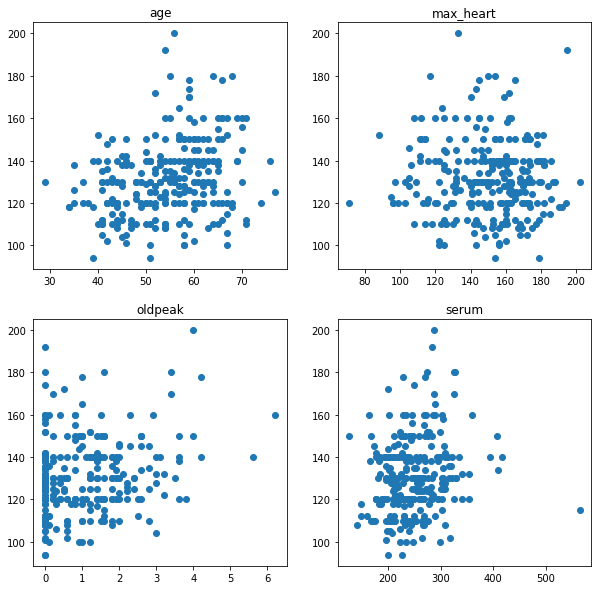

In [153]:
col = ['age', 'max_heart', 'oldpeak', 'serum']
cont = 0
plt.figure(figsize =(10,10))
for k in col:
  cont+=1
  plt.subplot(2,2,cont)
  plt.scatter(datos[k], dummy_lab['blood_p'])
  plt.title(k)
  

#Kfold

Sabemos que la K-validación cruzada nos permite aproximar el **error esperado** del modelo haciendo una partición del conjunto de datos. 
Por un lado, utilizamos KFold con K = 189 (Leave-one-out) y K=5. Por un lado, K=189 nos asegura un bias nulo debido a que sólo estamos utilizando 1 dato de validación mientras entrenamos con el resto. El problema, es que este dato puede no ser representativo por lo tanto el proceso tiende a tener una gran variación.
Por otro lado, esperamos que con una partición menor obtengamos una regularización de lo anterior debido a que nuestro conjunto de validación es mayor y, por ende, más representativo. 
Todo lo anterior se ve reflejado a continuación en donde se ve que el error para K=5 es menor que para LOOC. Pero sabemos que esta aproximación sub-estima el error original debido a que luego nosotros debemos entrenar el modelo con todos los datos y, por lo tanto, nuestro modelo estará obteniendo toda la información. Es por eso que el error de testeo posee un valor mucho mayor.

In [154]:
#Cross validation

def Kcross(X_train_scl,reg_train, K):
  mse = []
  for k in np.arange(K):
    up = (k+1)*int(len(X_train_scl)/K)
    down = k*int(len(X_train_scl)/K)
    k_x_val= X_train_scl[down:up]
    k_reg_val = reg_train[down:up]
    k_x_train =np.concatenate([X_train_scl[0:down], X_train_scl[up:]])
    k_reg_train = np.concatenate([reg_train[0:down], reg_train[up:]])
    k_linear = LinearRegression()
    k_linear.fit(k_x_train, k_reg_train)
    #print(k_x_train.shape[0], k_x_val.shape[0])
    k_pred = k_linear.predict(k_x_val)
    mse = mse + [MSE(k_pred, k_reg_val)]
    
  return mse

#K=189 (leave-one-out)
prueba = Kcross(X_train_scl, reg_train, 189)
mse1= sum(prueba)/189
print(len(prueba), mse1)


#K=5
prueba = Kcross(X_train_scl, reg_train, 5)
mse5 = sum(prueba)/5
print(len(prueba), mse5)

model_5 = LinearRegression(fit_intercept = True)
model_5.fit(X_train_scl, reg_train)
print('Error de testeo = ', MSE(model_5.predict(X_test_scl), reg_test))
  
  
  

189 319.4240622292222
5 329.9726613721067
Error de testeo =  304.37606014466127


In [0]:
from sklearn.model_selection import KFold

kf = KFold(n_splits = 5)
count = 0
mse_cv = []
for k_x , k_val in kf.split(X_train_scl):
  count +=1
  k_model = LinearRegression(fit_intercept = True)
  k_model.fit(X_train_scl[k_x], reg_train[k_x])
  k_reg_pred = k_model.predict(X_train_scl[k_val])
  mse_cv = mse_cv + [MSE(k_reg_pred, reg_train[k_val])]
  #if count == 1:
    #break
  
  

#Regularización

En lo que sigue mostraremos los resultados para la regularización L2 (Ridge) y L1 (Lasso). Al final de Lasso escribiremos la comparación y percepción de cada modelo.

En base a la teoría sabemos que Ridge penaliza los atributos en forma más **suave** que Lasso, en el sentido que los atributos nunca logran ser completamente nulos (pero sí obtener valores muy pequeños y, con un truncamiento, podemos deshacernos de ellos pero es posible perder información valiosa). Mientras que Lasso es más estricto con ello y sí lleva a los atributos a un valor nulo cuando el regularizador es muy grande.

El menor error de testeo es = 282.0543875465246  con un alpha =  222.29964825261956


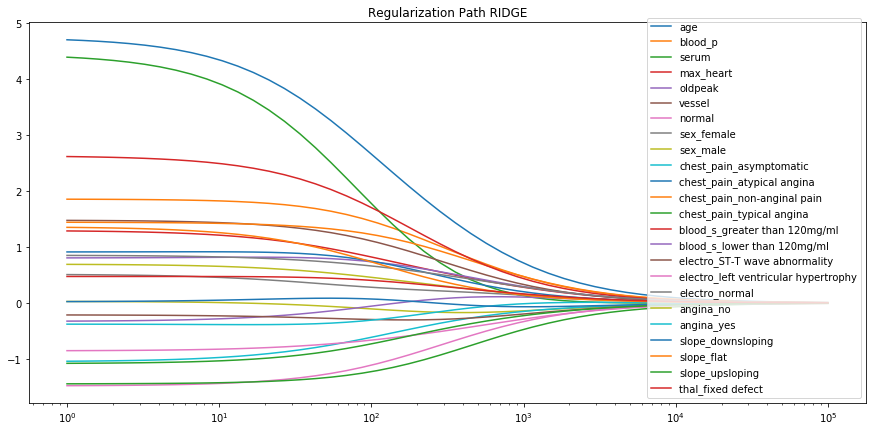

In [156]:
#(J)
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import Ridge
alphas_ridge = np.logspace(5,0, base=10)
coefs_ridge = []
model_ridge = Ridge(fit_intercept=True, solver='svd')
dummy_error = 10**100
cont = 0
for a in alphas_ridge:
    model_ridge.set_params(alpha=a)
    model_ridge.fit(X_train_scl, reg_train)
    #print('MSE Test = ', mean_squared_error(model_ridge.predict(X_test_scl), reg_test), 'alpha = ', a, 'Entrada = ', cont)
    error_ridge = mean_squared_error(model_ridge.predict(X_test_scl), reg_test)
    if error_ridge < dummy_error:
      dummy_error = error_ridge
      alpha_error_ridge = a
    coefs_ridge.append(model_ridge.coef_)
    cont+=1
names_regressors = df.columns
print('El menor error de testeo es =', dummy_error, ' con un alpha = ', alpha_error_ridge)
plt.figure(figsize=(15,7))
for y_arr, label in zip(np.squeeze(coefs_ridge).T, names_regressors):
    plt.plot(alphas_ridge, y_arr, label=label)
plt.legend()
plt.xscale('log')
plt.title('Regularization Path RIDGE')
plt.legend(loc='lower right')
plt.show()

El menor error de testeo es =  289.78835556354437  para un alpha =  1.9306977288832505


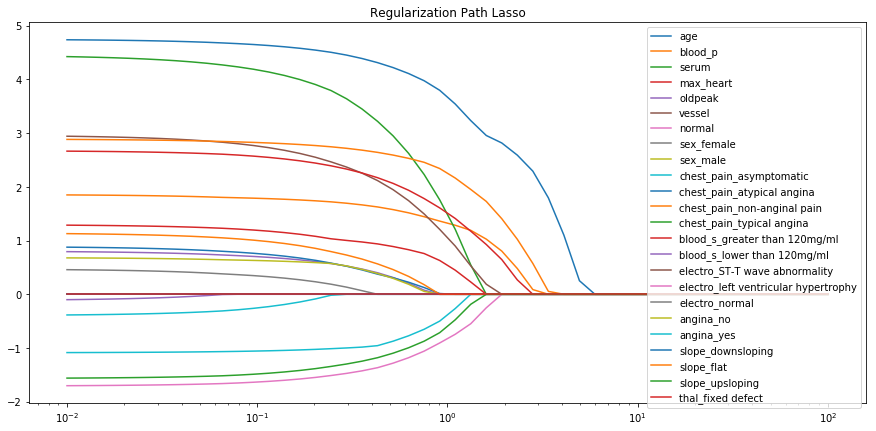

In [157]:
from sklearn.linear_model import Lasso

alphas_lasso = np.logspace(2,-2, base = 10)
coef_lasso = []
model_lasso = Lasso(fit_intercept = True)
dummy_lasso = 10**1000
for k in alphas_lasso:
  model_lasso.set_params(alpha= k)
  model_lasso.fit(X_train_scl, reg_train)
  #print('MSE Test = ', mean_squared_error(model_lasso.predict(X_test_scl),reg_test), 'alpha = ', k)
  error_lasso = mean_squared_error(model_lasso.predict(X_test_scl),reg_test)
  if error_lasso < dummy_lasso:
    dummy_lasso = error_lasso
    alpha_error_lasso = k
  coef_lasso.append(model_lasso.coef_)
print('El menor error de testeo es = ', dummy_lasso, ' para un alpha = ', alpha_error_lasso)
plt.figure(figsize = (15,7))
for a,b in zip(np.squeeze(coef_lasso).T, names_regressors):
  plt.plot(alphas_lasso,a, label = b)
plt.legend()
plt.xscale('log')
plt.title('Regularization Path Lasso')
plt.show()

Por un lado, gracias al gráfico de Ridge es posible corroborar lo dicho en un principio y es que ninguna de las variables logra ser completamente cero, mientras que en Lasso vemos que ellas van callendo **drásticamente** hacía el eje X. 

Gracias a lo anterior, vemos que el error mínimo conseguido por Ridge en el conjunto de testeo es mucho mayor que el conseguido en Lasso. Esto es debido a lo explicado anteriormente y el hecho de que estamos trabajando con un problema que se ajusta mejor a un problema lineal. Desde que Lasso utiliza la norma L1, ella se ajusta de mejor manera a los parámetros. Además, como envía a cero a aquellos parámetros que se ven muy afectados con el regularizador el error disminuye aún más. 

interactive(children=(IntSlider(value=0, description='param', max=10, min=-10), Output()), _dom_classes=('widg…

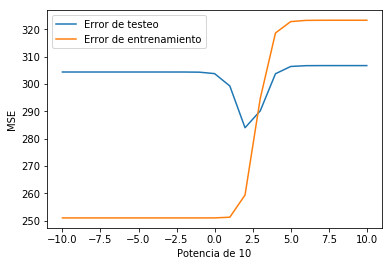

In [158]:
from ipywidgets import interactive
from sklearn.metrics import mean_squared_error
def train_model_ridge(param):
    model = Ridge(fit_intercept = True, solver = 'svd' )#define the model (Ridge and Lasso)
    A = 10**(param)
    print("Param alpha= ",A)
    model.set_params(alpha=A)
    model.fit(X_train_scl, reg_train)
    print("MSE train: ", mean_squared_error(reg_train, model.predict(X_train_scl) ))
    print("MSE test: ", mean_squared_error(reg_test, model.predict(X_test_scl) ))
    
p_min = -10 #define your range
p_max = 10 #define your range

error_rid_train = []
error_rid_test = []
for k in np.arange(p_min,p_max +1, dtype = float):
  claro = Ridge(fit_intercept = True, solver = 'svd' )
  B = 10**k
  claro.set_params(alpha = B)
  claro.fit(X_train_scl,reg_train)
  etrain = mean_squared_error(reg_train, claro.predict(X_train_scl))
  etest = mean_squared_error(reg_test, claro.predict(X_test_scl))
  error_rid_test = error_rid_test + [etest]
  error_rid_train = error_rid_train + [etrain]
plt.plot(np.arange(p_min, p_max+1), error_rid_test, label = 'Error de testeo')
plt.plot(np.arange(p_min, p_max+1), error_rid_train, label = 'Error de entrenamiento')
plt.xlabel('Potencia de 10')
plt.ylabel('MSE')
plt.legend()
interactive(train_model_ridge, param=(p_min,p_max))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1898.8307088219735, tolerance: 6.110380952380952
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1898.7825424464972, tolerance: 6.110380952380952
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1898.784270509328, tolerance: 6.110380952380952
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1898.784554529

interactive(children=(IntSlider(value=0, description='param', max=10, min=-10), Output()), _dom_classes=('widg…

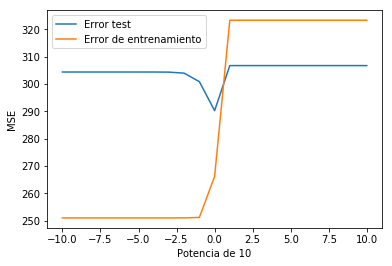

In [159]:
from ipywidgets import interactive
from sklearn.metrics import mean_squared_error
def train_model_lasso(param):
    model = Lasso(fit_intercept = True)#define the model (Ridge and Lasso)
    A = 10**(param)
    print("Param alpha= ",A)
    model.set_params(alpha=A)
    model.fit(X_train_scl, reg_train)
    print("MSE train: ", mean_squared_error(reg_train, model.predict(X_train_scl) ))
    print("MSE test: ", mean_squared_error(reg_test, model.predict(X_test_scl) ))
p_min = -10 #define your range
p_max = 10 #define your range

error_lasso_train = []
error_lasso_test = []
for k in np.arange(p_min,p_max +1, dtype = float):
  claro = Lasso(fit_intercept = True )
  B = 10**k
  claro.set_params(alpha = B)
  claro.fit(X_train_scl,reg_train)
  etrain = mean_squared_error(reg_train, claro.predict(X_train_scl))
  etest = mean_squared_error(reg_test, claro.predict(X_test_scl))
  error_lasso_train  = error_lasso_train + [etrain]
  error_lasso_test = error_lasso_test + [etest]
plt.plot(np.arange(p_min, p_max +1), error_lasso_test, label = 'Error test')
plt.plot(np.arange(p_min, p_max+1), error_lasso_train, label = 'Error de entrenamiento')
plt.xlabel('Potencia de 10')
plt.ylabel('MSE')
plt.legend()
interactive(train_model_lasso, param=(p_min,p_max))

Los gráficos anteriores muestran el comportamiento de los errores de entrenamiento y de testeo para disintos valores de alpha (El eje X son las potencias de 10). Se ve claramente que para valores altos de alpha en mambos modelos, el error tanto de entrenamiento y testeo se vuelven cte debido a que los parámetros quedan con valores extremadamente pequeños. 

Los valores de alpha elegidos para Ridge y Lasso quedaron expuestos anteriormente y fueron elegidos de tal manera de minimizar lo más posible el error de testeo.

 Los atributos seleccionados son  ['age' 'blood_s_lower than 120mg/ml' 'electro_ST-T wave abnormality'
 'max_heart' 'angina_yes']
 Con un error de testeo = 315.41405766267604


Text(0, 0.5, 'MSE')

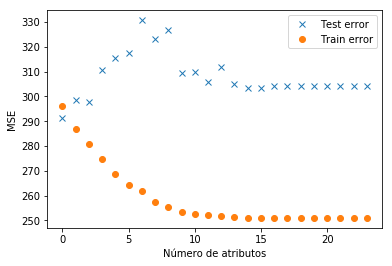

In [160]:
def FFS(X_train_scl, reg_train, K):
  min_atr = min(K, X_train_scl.shape[1])
  cont = 0
  model = LinearRegression(fit_intercept = True)
  dummy = np.zeros(X_train_scl.shape[0]).reshape(X_train_scl.shape[0],1)
  model.fit(dummy, reg_train)
  error = mean_squared_error(model.predict(dummy),reg_train)**10
  atributos = np.zeros(min_atr, dtype = 'int')
  rangos = np.zeros(min_atr, dtype = 'int')
  while cont < min_atr:
    for i in np.arange(X_train_scl.shape[1]):
      rangos[cont] = i
      if (i in rangos[: cont]) & (cont >0):
        continue
      dum_rangos = rangos[:cont+1]
      #print(dum_rangos)
      train = X_train_scl[:,(dum_rangos)]
      model = LinearRegression(fit_intercept = True)
      model.fit(train, reg_train)
      error1 = mean_squared_error(model.predict(train), reg_train)
      #print('variable i, error =' , error1)
      if error1 <= error:
        error = error1
       # print('error asociado a la variable = ', i)
        atributos[cont]= i
    rangos[cont]= atributos[cont]
    cont +=1
  return atributos, error

seleccionados, error = FFS(X_train_scl, reg_train, 5)
a = np.asarray(colu)
b = a[seleccionados]
print(' Los atributos seleccionados son ', b)
model_ffs = LinearRegression(fit_intercept = True)
model.fit(X_train_scl[:,seleccionados], reg_train)
print(' Con un error de testeo =', mean_squared_error(model.predict(X_test_scl[:,seleccionados]), reg_test))

train_error = []
test_error = []
for k in np.arange(1,X_train_scl.shape[1]+1):
  sel_train, error1 = FFS(X_train_scl, reg_train, k)
  model = LinearRegression(fit_intercept= True)
  model.fit(X_train_scl[:,sel_train], reg_train)
  etrain = mean_squared_error(model.predict(X_train_scl[:,sel_train]), reg_train)
  etest = mean_squared_error(model.predict(X_test_scl[:,sel_train]),reg_test)
  train_error = train_error + [etrain]
  test_error = test_error + [etest]
plt.plot(test_error, 'x', label = 'Test error')
plt.plot(np.arange(X_train_scl.shape[1]), train_error, 'o',label= 'Train error')

plt.legend()
plt.xlabel('Número de atributos')
plt.ylabel('MSE')

En lo anterior se realizó un **forward-stepwise-selection** para cumplir con las exigencias del médica el cual deseaba utilizar 5 variables. Ellas quedan expuestas anteriormente y, lo más interesenta, es que 4 de ellas son justamente las que mayor Correlación tienen con la presión en la sangre (Ver tabla de correlación expuesta anteriormente).

Aprovechando lo anterior, se fue más allá y se graficó el error de entrenamiento junto con el de testeo para un número distinto de atributos. Es claro que el error de entrenamiento tiende a disminuir debido a que estamos haciendo el modelo mucho más flexible y, por ende, tiende a 'aprenderse' de memoria las respuestas (overfiting). Pero lo que nos interesa es el error de testeo y para ello se ve que la mejor selección daría para 1 y 5 atributos.

#Fake data y desempeño de regularizadores

En lo que sigue se crearán variables dummy que se incorporarán al modelo y veremos si ellas son detectadas por los regularizadores. Cabe destacar que la distribución del *fake data* es normal y, desde que nuestro data set se ajusta bien a esta distribuicón (ver gráfico QQ), utilizaremos una media distinta de cero y una varianza distinta de 1 ya que nuestros datos están escalados.

En lo que sigue se utilizará el regularizador lasso debido a que con él podemos ver mejor gráficamente cómo las variables se van a cero.
Por último, debemos recordar que con el regularizador lasso, las variables se actualizan de la forma expuesta en la imagen **Lasso_param.png** adjunta en el rar.


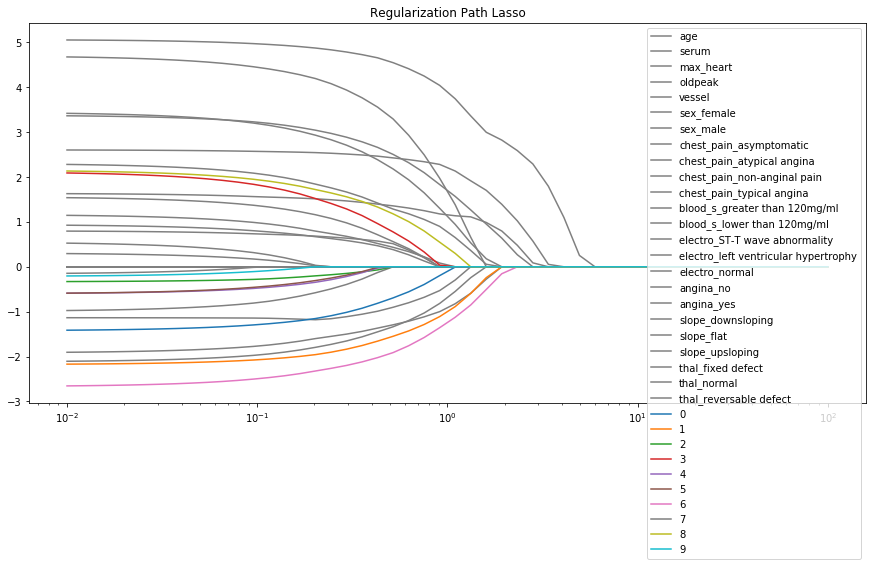

In [161]:
D = 10
fake_data =np.random.normal(loc = 10, scale = 1, size = (189,D))
x_fake_train = np.concatenate((X_train_scl, fake_data), axis = 1)

alphas_lasso = np.logspace(2,-2, base = 10)
coef_lasso = []
model_lasso = Lasso(fit_intercept = True)
for k in alphas_lasso:
  model_lasso.set_params(alpha= k)
  model_lasso.fit(x_fake_train, reg_train)
 # print('MSE = ', mean_squared_error(model_lasso.predict(X_test_scl),reg_test), 'alpha = ', k)
  coef_lasso.append(model_lasso.coef_)
names_regressors = list(colu) + list(np.arange(D))

plt.figure(figsize = (15,7))
cont=0
for a,b in zip(np.squeeze(coef_lasso).T, names_regressors):
  if cont<=23:
    plt.plot(alphas_lasso,a, label = b, color = 'gray')
  else:
    plt.plot(alphas_lasso,a,label = b)
  cont+=1
plt.legend()
plt.xscale('log')
plt.title('Regularization Path Lasso')
plt.show()

In [162]:
hola, error = FFS(x_fake_train, reg_train, 5)
a = list(hola)
b = np.asarray(names_regressors)
print(b[a])


['age' 'blood_s_lower than 120mg/ml' 'electro_ST-T wave abnormality' '1'
 'max_heart']


Notemos que para una varianza igual a la de nuestros datos, nuestro algoritmo FFS logra detectar una de las variables fake. 



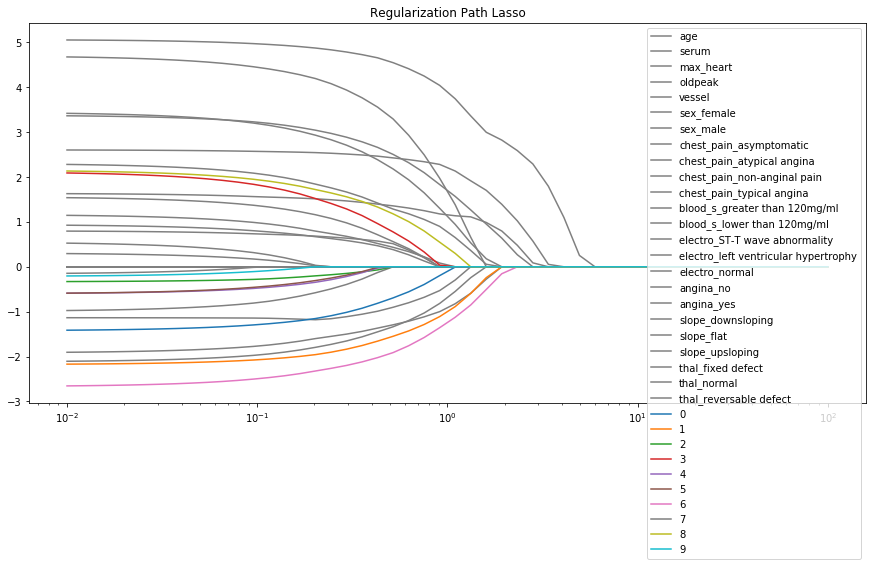

In [163]:
D = 10
fake_data =np.random.normal(loc = 10, scale = 10, size = (189,D))
x_fake_train1 = np.concatenate((X_train_scl, fake_data), axis = 1)

alphas_lasso = np.logspace(2,-2, base = 10)
coef_lasso = []
model_lasso = Lasso(fit_intercept = True)
for k in alphas_lasso:
  model_lasso.set_params(alpha= k)
  model_lasso.fit(x_fake_train, reg_train)
 # print('MSE = ', mean_squared_error(model_lasso.predict(X_test_scl),reg_test), 'alpha = ', k)
  coef_lasso.append(model_lasso.coef_)
names_regressors = list(colu) + list(np.arange(D))

plt.figure(figsize = (15,7))
cont=0
for a,b in zip(np.squeeze(coef_lasso).T, names_regressors):
  if cont<=23:
    plt.plot(alphas_lasso,a, label = b, color = 'gray')
  else:
    plt.plot(alphas_lasso,a,label = b)
  cont+=1
plt.legend()
plt.xscale('log')
plt.title('Regularization Path Lasso')
plt.show()

In [164]:
hola, error = FFS(x_fake_train1, reg_train, 5)
a = list(hola)
b = np.asarray(names_regressors)
print(b[a])


['age' '2' 'blood_s_lower than 120mg/ml' '6' 'max_heart']


En este caso, vemos que una de las variables dummy ( 2 y 6) logran generar un gran impacto dentro de la selección de atributos y es que al haber una mayor varianza, esto hace más dificil al regularizador hacerlas decaer.

Notemos que en lo anterior vale la pena ir cambiando la varianza ya que la cantidad de variables no afecta de manera considerable el regularizador. Es posible observar que con una varianza que es de un orden mayor, el regularizador no logra anular ninguna de las variables antes que las otras. Esto es debido a la imagen anteriormente expuesta y es que el aumentar la varianza en un orden de magnitud implica que el regularizador deberá hacer un trabajo del mismo aumento para poder recién comenzar a afectar a dichas variables, mientras que la varianza de las otras variables sigue igual. Es por eso que con una varianza mayor, es más difícil deshacerse de las variables dummy.



#Detectando Enfermedad

El mejor modelo se dio para Lasso

Text(0.5, 0, 'Número de atributos')

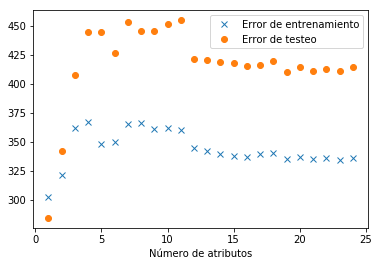

In [165]:
sanos = y_train == 0
graf_train = []
graf_test = []
for k in np.arange(X_train_scl.shape[1]):
  sel, er = FFS(X_train_scl[sanos], reg_train[sanos],k+1)
  model_a = LinearRegression(fit_intercept = True)
  model_a.fit(X_train_scl[:,sel][sanos],reg_train[sanos])
  pred_tr = model_a.predict(X_train_scl[:,sel])
  pred_te = model_a.predict(X_test_scl[:,sel])
  graf_train = graf_train + [mean_squared_error(pred_tr, reg_train)]
  graf_test = graf_test + [mean_squared_error(pred_te, reg_test)]

plt.plot(np.arange(1,X_train_scl.shape[1]+1), graf_train, 'x', label = 'Error de entrenamiento')
plt.plot(np.arange(1,X_train_scl.shape[1]+1), graf_test, 'o', label = 'Error de testeo')
plt.legend()
plt.xlabel('Número de atributos')

In [0]:
#(p) Utilizaremos el modelo FFS ya que fue el que obtuvo un menor error

sanos = y_train == 0
#selec, er = FFS(X_train_scl[sanos], reg_train[sanos], 9)
model_f = Ridge(fit_intercept = True, solver = 'svd')
model_f.set_params(alpha = alpha_error_ridge)
model_f.fit(X_train_scl[sanos], reg_train[sanos])

b_pred_train = model_f.predict(X_train_scl)
b_pred_test = model_f.predict(X_test_scl)

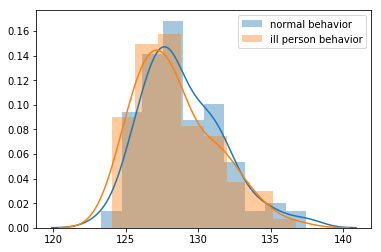

In [167]:
import seaborn as sns
sns.distplot(b_pred_train[sanos], label="normal behavior")
sns.distplot(b_pred_train[~sanos], label="ill person behavior")
plt.legend()
plt.show()

def predict_umbr(data, umbral_up, umbral_low):
    preds = []
    for value in data:
        if value > umbral_up or value < umbral_low:
            preds.append(1) #presencia
        else:
            preds.append(0)
    return np.asarray(preds)

predict_train_umbr = predict_umbr(b_pred_train,135,119)
predict_test_umbr = predict_umbr (b_pred_test, 135,119)

Train Accuracy  0.5396825396825397
Test Accuracy  0.5432098765432098


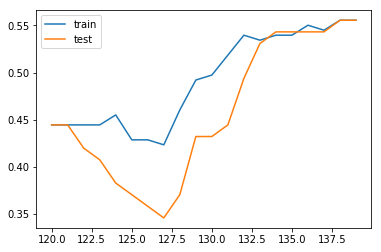

In [168]:
from sklearn.metrics import accuracy_score

va_tr = []
va_te = []
for a in np.arange(120, 140):
  pre_tr_um = predict_umbr(b_pred_train, a, 119)
  pre_te_um = predict_umbr(b_pred_test, a, 119)
  va_tr = va_tr + [accuracy_score(pre_tr_um, y_train)]
  va_te = va_te + [accuracy_score(pre_te_um, y_test)]
  
plt.plot(np.arange(120,140),va_tr, label = 'train')
plt.plot(np.arange(120,140), va_te, label = 'test')
plt.legend()
print('Train Accuracy ', accuracy_score(predict_train_umbr,y_train))
print('Test Accuracy ' , accuracy_score(predict_test_umbr, y_test))

In [169]:
#Comparación con Perceptron

from sklearn.linear_model import Perceptron

percep = Perceptron(fit_intercept=True, eta0=1.0, max_iter=1000, n_jobs=-1)
percep.fit(X_train_scl, y_train)

per_pred_train = percep.predict(X_train_scl)
per_pred_test = percep.predict(X_test_scl)

print('Train Accuracy ', accuracy_score(per_pred_train, y_train))
print('Test Accuracy ' , accuracy_score(per_pred_test, y_test))

Train Accuracy  0.8201058201058201
Test Accuracy  0.8395061728395061


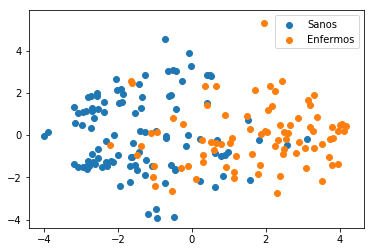

In [170]:
#pca

from sklearn.decomposition import PCA
d = 2
pca_model = PCA(n_components=d)
pca_model.fit(X_train_scl)
X_pca_train = pca_model.transform(X_train_scl)
X_pca_test = pca_model.transform(X_test_scl)
plt.scatter(X_pca_train[:,0][sanos], X_pca_train[:,1][sanos], label = 'Sanos')
plt.scatter(X_pca_train[:,0][~sanos], X_pca_train[:,1][~sanos], label = 'Enfermos')
plt.legend()
plt.show()

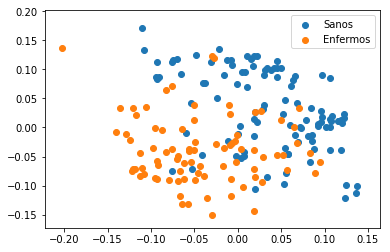

In [171]:
from sklearn.decomposition import FastICA

ica_model = FastICA(n_components = d, random_state = 0)
ica_model.fit(X_train_scl)
X_ica_train = ica_model.transform(X_train_scl)
X_ica_test = ica_model.transform(X_test_scl)
plt.scatter(X_ica_train[:,0][sanos], X_ica_train[:,1][sanos], label = 'Sanos')
plt.scatter(X_ica_train[:,0][~sanos], X_ica_train[:,1][~sanos], label = 'Enfermos')
plt.legend()
plt.show()

En ambos casos anteriores utilizamos sistemas de reducción de dimensionalidad. Mientras que PCA es más famoso por mantener la variabilidad de los datos en las dimensiones deseadas, ICA trata los datos de manera independiente.

Aún así, ambos logran captar la tendencia de los pacientes enfermos y sanos.  Lo que nos interesa saber ahora y si dicha reducción de dimensionalidad nos ayudará a mejor la precisión de nuestros modelos. En lo que sigue utilizaremos PCA para realizar dicho estudio.

#Selección dimensionalidad

Graficamos el accuracy para 3 modelos distintos en función de la dimensiónde los datos generados por PCA.

El primero de ellos es el perceptrón el cual muestra una mejora al utilizar todos los datos en el dataset de testeo.

El segundo de ellos fue el modelo Umbral el cual decae considerablemente a medida que aumentamos la cantidad de atributos. Esto es debido a que los datos están comprimidos en una sola variable y, como vimos anteriormente, la variable **age** posee mucho impacto dentro del conjunto, por lo tanto en el espacio vectorial real de 1 dimensión, su peso en la base canónica posee casi todo el valor permitido (que es 1).

El tercero de ellos fue simplemente un modelo lineal ajustado a los datos. Podemos ver que su pick se alcanza con dimensión dos, en el cual, como vimos anteriormente, Age es la variable con más correlación y, por ende, mayor ajuste lineal al modelo. Con dos dimensiones estamos entregando un poco más de peso a las demás haciendo que el modelo se logre ajusta bien, mientras que al momento de ir añadiendo más dimensiones, hacemos el modelo más flexible lo que hace que se lleve al **overfiting** sobre todo en modelos lineales que poseen una varianza grande para las variables en las cuales tenemos poca correlación (en este caso).

Text(0, 0.5, 'Accuracy')

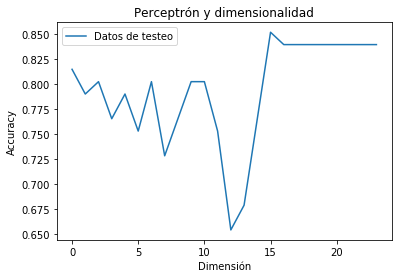

In [172]:
#Criterio para selección de dimensionalidad

pca_acc= []
for d in np.arange(1,X_train_scl.shape[1]+1):
  pca = PCA(n_components = d)
  pca.fit(X_train_scl)
  pca_train = pca.transform(X_train_scl)
  pca_test = pca.transform(X_test_scl)
  model = Perceptron(fit_intercept=True, eta0=1.0, max_iter=1000, n_jobs=-1)
  model.fit(pca_train, y_train)
  pred_tr = model.predict(pca_train)
  pred_te = model.predict(pca_test)
  pca_acc = pca_acc + [accuracy_score(pred_te, y_test)]

plt.plot(pca_acc)
plt.legend(['Datos de testeo'])
plt.title('Perceptrón y dimensionalidad')
plt.xlabel('Dimensión')
plt.ylabel('Accuracy')


Text(0, 0.5, 'Accuracy')

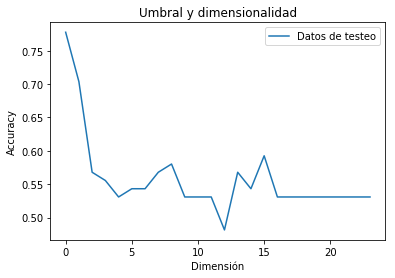

In [173]:

p_acc= []
for d in np.arange(1,X_train_scl.shape[1]+1):
  pca= PCA(n_components = d)
  pca.fit(X_train_scl)
  pca_train = pca.transform(X_train_scl)
  pca_test = pca.transform(X_test_scl)
  model = LinearRegression(fit_intercept = True)
  model.fit(pca_train, reg_train)
  pred_train = model.predict(pca_train)
  pred_test = model.predict(pca_test)
  claro_train =  predict_umbr(pred_train,130 , 125)
  claro_test =  predict_umbr(pred_test,130 , 125)
  #pred_tr = model.predict(pca_train)
  #pred_te = model.predict(pca_test)
  p_acc = p_acc + [accuracy_score(claro_test, y_test)]

plt.plot(p_acc)
plt.legend(['Datos de testeo'])
plt.title('Umbral y dimensionalidad')
plt.xlabel('Dimensión')
plt.ylabel('Accuracy')

Text(0.5, 1.0, 'accuracy vs dimensión')

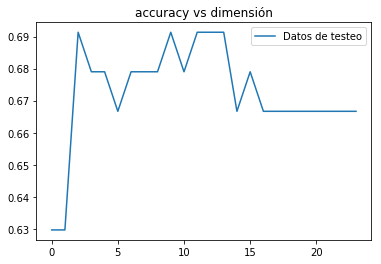

In [174]:

pca_acc= []
for d in np.arange(1,X_train_scl.shape[1]+1):
  pca = PCA(n_components = d)
  pca.fit(X_train_scl)
  pca_train = pca.transform(X_train_scl)
  pca_test = pca.transform(X_test_scl)
  model = LinearRegression(fit_intercept=True)
  model.fit(pca_train, y_train)
  pred_tr = model.predict(pca_train)
  pred_te = model.predict(pca_test)
  pca_acc = pca_acc + [accuracy_score(np.asarray(pred_te,dtype='int'), y_test)]

plt.plot(pca_acc)
plt.legend(['Datos de testeo'])
plt.title('Lineal vs dimensión')

En general lo que se puede concluir es que nuetro modelo posee componentes que se ajustan muy bien al modelo lineal (como lo es la variable age) y hace que al momento de ir aumentando la dimensionalidad, el peso asignado a dicha variable vaya disminuyendo ya que existen más dimensiones y, por lo tanto, mayor flexibilidad. Es lógico que tienda a descender nuestro rendimiento a la larga en los datos de testeo.